In [162]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [78]:
df = pd.read_csv('../data/telecom_churn.csv')

In [62]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


## whole data visualization

In [79]:
df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})

#### This changes the values in 'International Plan' from Yes/No to 1/0.
Now do the same for the 'Voice mail plan' and 'Churn' columns:

In [80]:
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [81]:
df['Churn'] = df['Churn'].astype('int')

In [82]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


#### Now if we drop 'State' and 'Churn' columns, we can see a histogram for each of the remaining data columns:

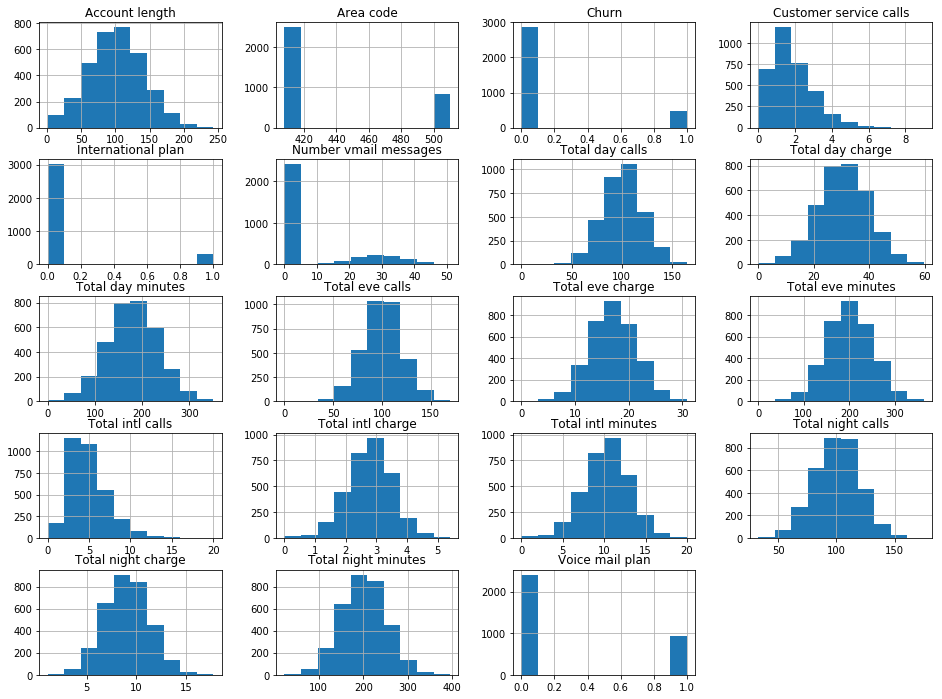

In [85]:
plt.rcParams['figure.figsize'] = (16,12) ## This changes the size of each figure permanently
df.drop(['State'], axis=1).hist(); # <-- notice the ";" removes statements about the histogram objects! 

### Now let's build a correlation matrix
df.corr() builds a numerical correlation matrix, but let's color code it:

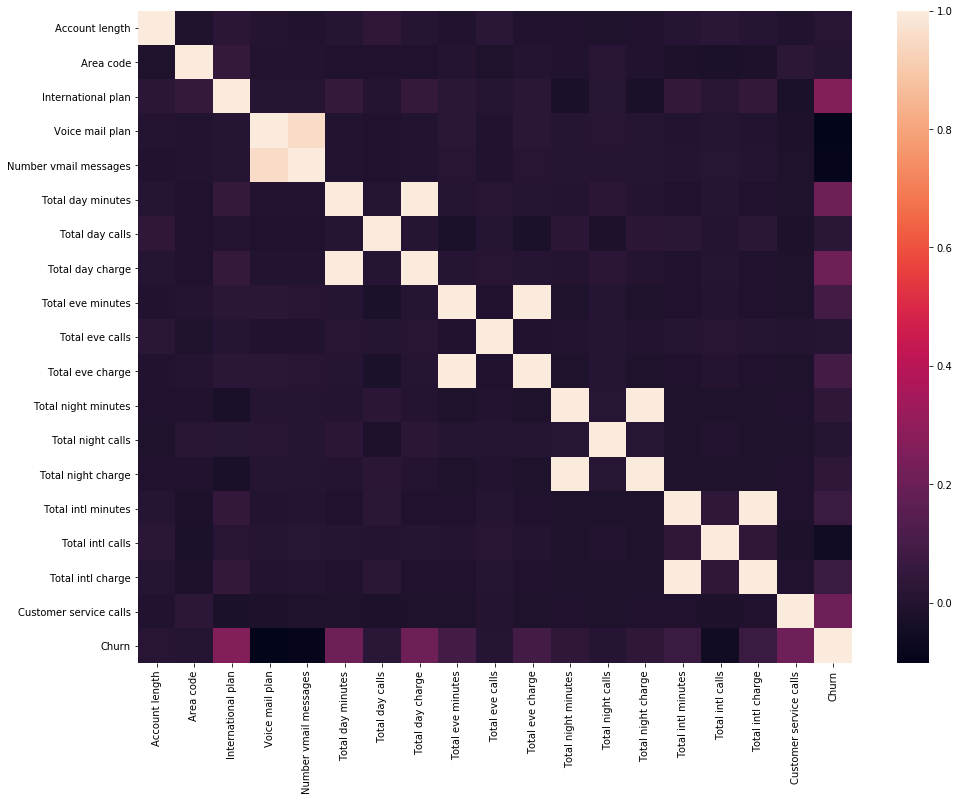

In [86]:
sns.heatmap(df.corr());

### We see a correlation between the columns that are charges
Let's collect those column names into a list:

In [105]:
[feat_name for feat_name in df.columns
    if 'charge' in feat_name]

['Total day charge',
 'Total eve charge',
 'Total night charge',
 'Total intl charge']

...and drop them from the dataframe (and be sure to specify if you'd like to permanently modify the data or not by setting *inplace = True/False*):

In [109]:
df.drop([feat_name for feat_name in df.columns
    if 'charge' in feat_name], axis = 1, inplace=True)

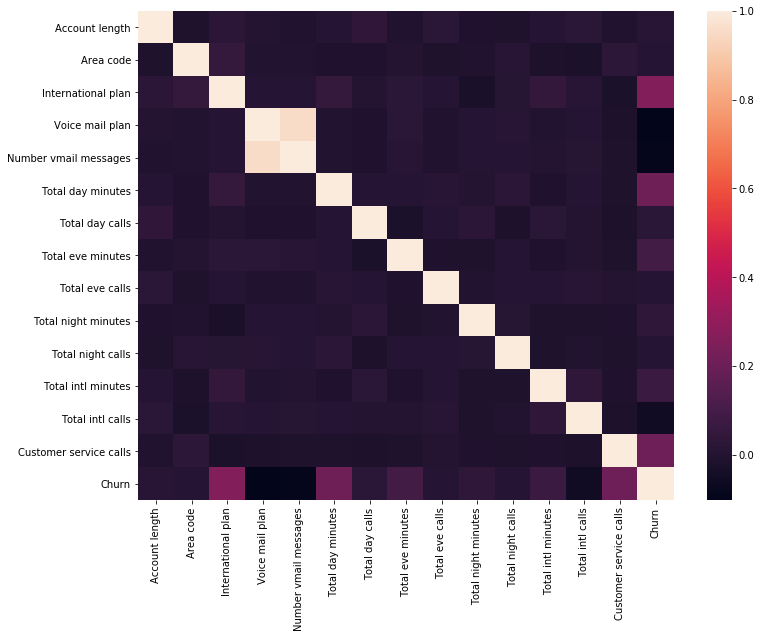

In [159]:
plt.rcParams['figure.figsize'] = (12,9)
sns.heatmap(df.drop([feat_name for feat_name in df.columns
    if 'charge' in feat_name], axis = 1, inplace=False).corr());

## See also: 
### TSNE = t-distributed Stochastic Neighbor Embedding
(co-authored by Geoffrey Hinton)   
Mapping from *n*-dim space to 2D, but keeping close neighbors as close neighbors and distant neighbors and distant neighbors. [See here for more details](https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic02_visual_data_analysis/topic2_visual_data_analysis.ipynb?flush_cache=true)

In [138]:
from sklearn.manifold import TSNE

In [141]:
state = df.State
df.drop('State', axis=1, inplace=True)

In [144]:
tsne = TSNE(random_state=17)

In [146]:
%%time
X_repr = tsne.fit_transform(df) # this should first be scaled but we skipped it in this lecture

Wall time: 3min 28s


In [147]:
X_repr.shape

(3333, 2)

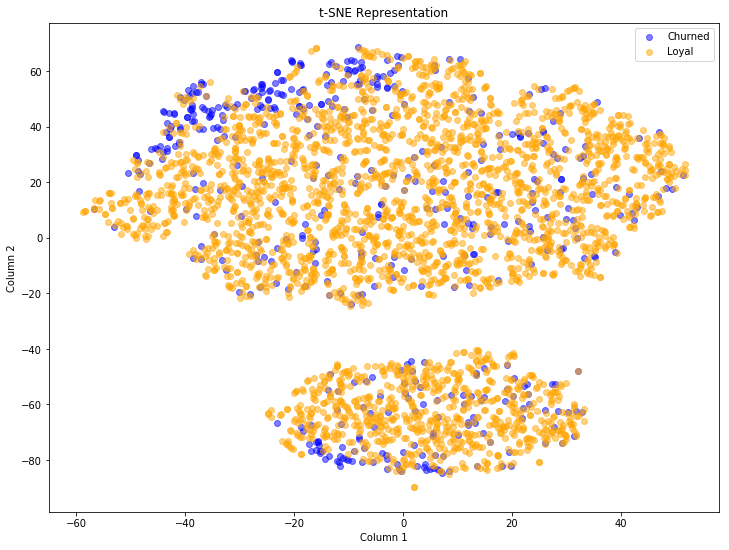

In [156]:
plt.rcParams['figure.figsize']= (12,9)
# plt.scatter(X_repr[:,0], X_repr[:,1]);
plt.scatter(X_repr[df['Churn']==1,0], 
            X_repr[df['Churn']==1,1], alpha=0.5, c='blue',
           label="Churned");

plt.scatter(X_repr[df['Churn']==0,0], 
            X_repr[df['Churn']==0,1], alpha=0.5, c='orange',
           label='Loyal');

plt.title('t-SNE Representation');
plt.xlabel('Column 1');
plt.ylabel('Column 2');
plt.legend(); # calls labels from each plot
plt.savefig('churn_tsne.png', dpi=300)

### And now add the .png file to the notebook with Markdown:

<img src='churn_tsne.png'>

In [145]:
# X_repr_churn = tsne.fit_transform(df[df['Churn']==1])

In [160]:
# X_repr_loyal = tsne.fit_transform(df[df['Churn']==0])

# Features one-at-a-time

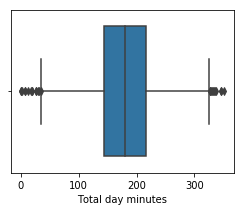

In [158]:
plt.rcParams['figure.figsize']=(4,3)
sns.boxplot(x='Total day minutes', data=df);

### Categorical

In [121]:
df['Churn'].value_counts(normalize=True)

0    0.855086
1    0.144914
Name: Churn, dtype: float64

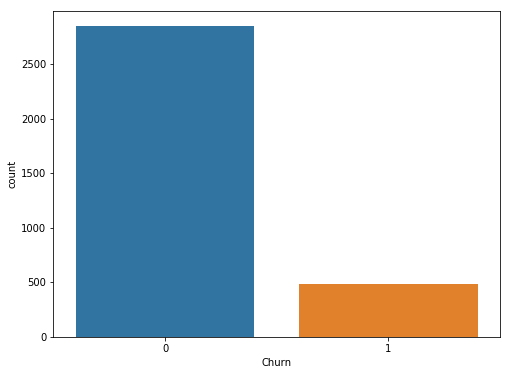

In [125]:
plt.rcParams['figure.figsize']=(8,6)
sns.countplot(x='Churn', data=df);

## Interactions between features
### Numeric-Numeric interactions

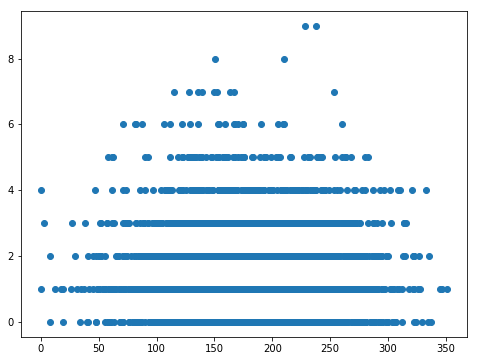

In [126]:
plt.scatter(df['Total day minutes'], df['Customer service calls']);

In [133]:
df.corrwith(df['Total day minutes'])

Account length            0.006216
Area code                -0.008264
International plan        0.049396
Voice mail plan          -0.001684
Number vmail messages     0.000778
Total day minutes         1.000000
Total day calls           0.006750
Total eve minutes         0.007043
Total eve calls           0.015769
Total night minutes       0.004323
Total night calls         0.022972
Total intl minutes       -0.010155
Total intl calls          0.008033
Customer service calls   -0.013423
Churn                     0.205151
dtype: float64

### Categorical-Categorical interations

In [134]:
pd.crosstab(df['Churn'], df['Customer service calls'])    

Customer service calls,0,1,2,3,4,5,6,7,8,9
Churn,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0
1,92,122,87,44,76,40,14,5,1,2


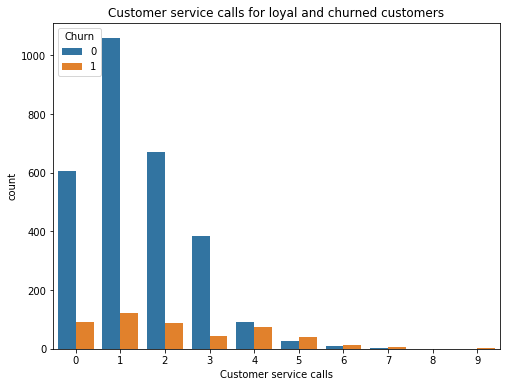

In [137]:
sns.countplot(x='Customer service calls', data=df, hue='Churn');
plt.title('Customer service calls for loyal and churned customers');

 ### Categorical-Numeric interaction

In [161]:
df.groupby('Churn')['Total day minutes', 'Customer service calls'].mean()

,Total day minutes,Customer service calls
Churn,,
0,175.175754,1.449825
1,206.914079,2.229814


In [166]:
df.groupby('Churn')['Total day minutes', 'Customer service calls'].agg(np.median)

,Total day minutes,Customer service calls
Churn,,
0,177.2,1
1,217.6,2


In [167]:
df.groupby('Churn')['Total day minutes', 'Customer service calls'].agg([np.median, np.std, np.max])

Total day minutes                   Customer service calls            \
                 median        std   amax                 median       std   
Churn                                                                        
0                 177.2  50.181655  315.6                      1  1.163883   
1                 217.6  68.997792  350.8                      2  1.853275   

            
      amax  
Churn       
0        8  
1        9

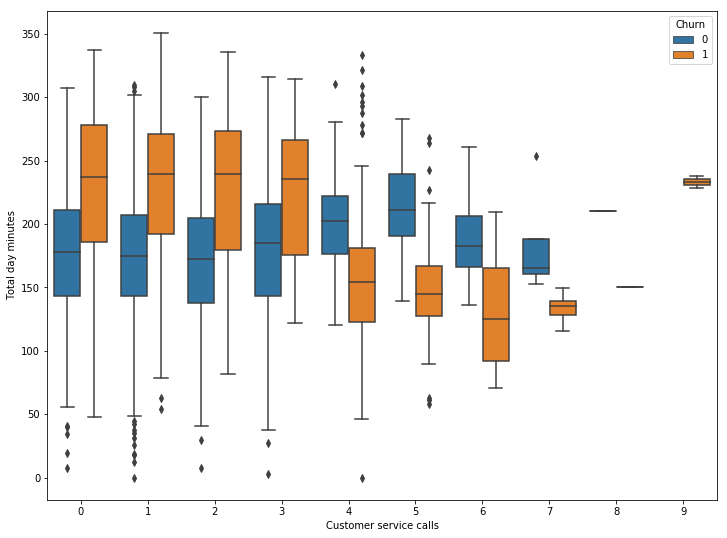

In [169]:
sns.boxplot(x='Customer service calls', y='Total day minutes', data=df, hue='Churn');